<a href="https://colab.research.google.com/github/kavya2002sree/GWP/blob/main/Copy_of_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/refrigerant data - Sheet1.csv')

In [ ]:
df.dtypes

Name                                                   object
Chemical formula or blend composition, common name     object
Molecular mass                                        float64
NBP                                                   float64
Tc(˚C)                                                float64
Pc (MPa)                                              float64
COP                                                   float64
OEL (PPMv)                                            float64
LFL (%)                                               float64
HOC                                                   float64
ODP                                                   float64
GWP\n (100 yr)                                        float64
Reference                                              object
COP Reference                                          object
Atmospheric life, tatm (yr)                            object
dtype: object

In [ ]:
for col in df.columns:
    print(str(col)+' : '+str((df[col].isnull().sum()/df.shape[0])*100))

Name : 0.9302325581395349
Chemical formula or blend composition, common name : 1.8604651162790697
Molecular mass : 0.0
NBP : 0.0
Tc(˚C) : 0.0
Pc (MPa) : 0.0
COP : 3.255813953488372
OEL (PPMv) : 41.3953488372093
LFL (%) : 8.837209302325581
HOC : 69.30232558139535
ODP : 0.46511627906976744
GWP
 (100 yr) : 1.8604651162790697
Reference : 31.16279069767442
COP Reference : 69.76744186046511
Atmospheric life, tatm (yr) : 68.37209302325581


In [ ]:
df.drop(columns=['Chemical formula or blend composition, common name', 'HOC', 'Reference', 'OEL (PPMv)', 'COP Reference', 'Atmospheric life, tatm (yr)'], axis=1, inplace=True )

In [ ]:
for col in df.columns:
    print(str(col)+' : '+str((df[col].isnull().sum()/df.shape[0])*100))

Name : 0.9302325581395349
Molecular mass : 0.0
NBP : 0.0
Tc(˚C) : 0.0
Pc (MPa) : 0.0
COP : 3.255813953488372
LFL (%) : 8.837209302325581
ODP : 0.46511627906976744
GWP
 (100 yr) : 1.8604651162790697


In [ ]:
df.head()

,Name,Molecular mass,NBP,Tc(˚C),Pc (MPa),COP,LFL (%),ODP,GWP\n (100 yr)
0,10,153.82,76.7,283.3,4.56,NaN,2.8,0.82,1400.0
1,11,137.37,23.7,198.0,4.41,5.09,9.5,1.00,4750.0
2,12B1,165.36,-4.0,154.0,4.10,NaN,NaN,7.10,1890.0
3,12,120.91,-29.8,112.0,4.14,4.70,17.0,1.00,10890.0
4,13B1,148.91,-58.7,67.1,3.97,NaN,8.8,16.00,7140.0


In [ ]:
df = df.dropna(subset=["COP", "LFL (%)", "ODP", "GWP\n (100 yr)"])

In [ ]:
for col in df.columns:
    print(str(col)+' : '+str((df[col].isnull().sum()/df.shape[0])*100))

Name : 0.5319148936170213
Molecular mass : 0.0
NBP : 0.0
Tc(˚C) : 0.0
Pc (MPa) : 0.0
COP : 0.0
LFL (%) : 0.0
ODP : 0.0
GWP
 (100 yr) : 0.0


In [ ]:
df.dtypes

Name               object
Molecular mass    float64
NBP               float64
Tc(˚C)            float64
Pc (MPa)          float64
COP               float64
LFL (%)           float64
ODP               float64
GWP\n (100 yr)    float64
dtype: object

In [ ]:
df['NBP'] = df['NBP'].astype('float64')

In [ ]:
df['COP'] = df['COP'].astype('float64')
df['Molecular mass'] = df['Molecular mass'].astype('float64')

### Ploting correlation matrix

<ipython-input-15-27cd25d2d107>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


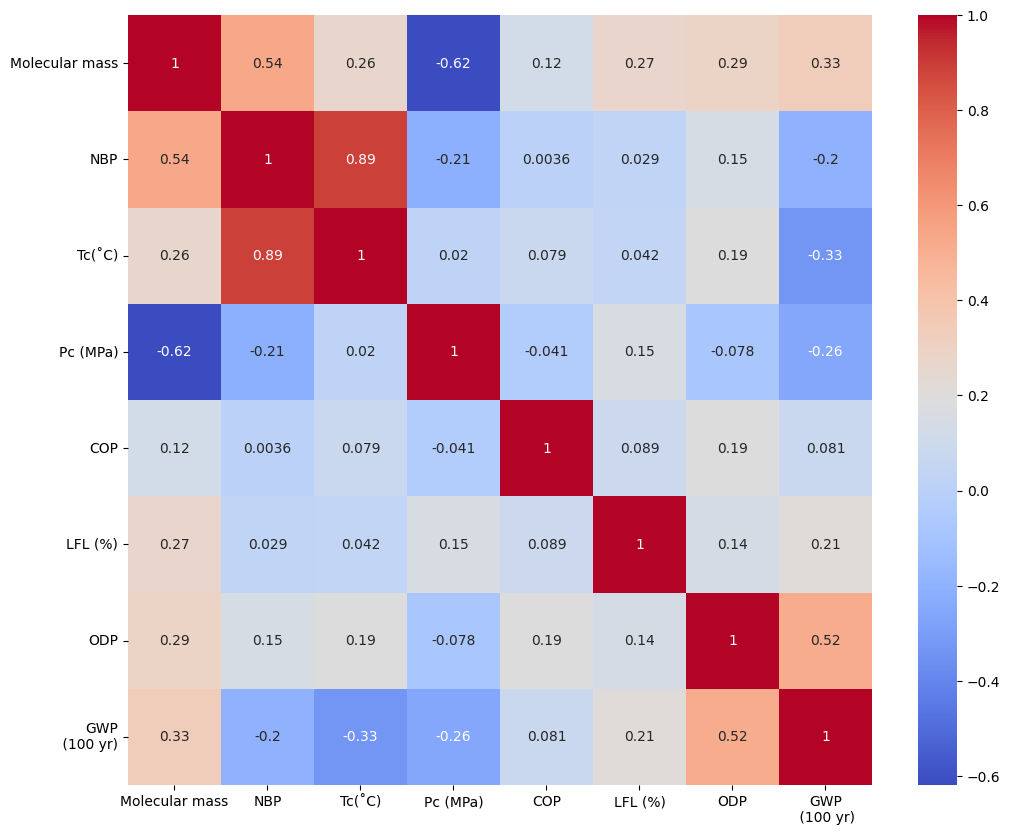

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.xticks(rotation=360)
plt.yticks(rotation=0)
plt.show()

### Train test split

In [ ]:
X = df.drop(['GWP\n (100 yr)', 'Name'],axis=1).values   # independant features
y = df['GWP\n (100 yr)'].values		# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Normalization

In [ ]:
# Initialize scaler object
scaler = StandardScaler()

# Fit scaler to training data and transform training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Define the XGBoost regressor model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.4, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_reg.predict(X_test)

r2 = r2_score(y_test,y_pred)
print("R2 Score of random forest: ",r2)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R2 Score of random forest:  0.557585217167297
Mean Squared Error: 5228055.820785305


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = RandomForestRegressor(max_features=9, n_estimators=200, random_state=42)
model.fit(X_train, y_train)
model.predict(X_test)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("mean square error: "+str(mse))
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,y_pred)
print("R2 Score of random forest: ",r2)

mean square error: 3283184.566623684
root mean square error : 1811.9560057086608
R2 Score of random forest:  0.7221664349359769


### GBDT model

In [ ]:
# Initialize GBDT model
gbdt = GradientBoostingRegressor(n_estimators=70, learning_rate=0.1, max_depth=2, random_state=42)

# Initialize k-fold cross-validation object
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate model using cross-validation
train_r2_scores = []
train_mse_scores = []
test_r2_scores = []
test_mse_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gbdt.fit(X_train, y_train)

    train_pred = gbdt.predict(X_train)
    train_r2_scores.append(r2_score(y_train, train_pred))
    train_mse_scores.append(mean_squared_error(y_train, train_pred))

    test_pred = gbdt.predict(X_test)
    test_r2_scores.append(r2_score(y_test, test_pred))
    test_mse_scores.append(mean_squared_error(y_test, test_pred))

# Print mean and standard deviation of R2 and MSE scores for training and testing data
print(f"Training R2 score: {np.mean(train_r2_scores):.2f} +/- {np.std(train_r2_scores):.2f}")
print(f"Training MSE: {np.mean(train_mse_scores):.2f} +/- {np.std(train_mse_scores):.2f}")
print(f"Testing R2 score: {np.mean(test_r2_scores):.2f} +/- {np.std(test_r2_scores):.2f}")
print(f"Testing MSE: {np.mean(test_mse_scores):.2f} +/- {np.std(test_mse_scores):.2f}")


Training R2 score: 0.95 +/- 0.01
Training MSE: 485285.39 +/- 93470.44
Testing R2 score: 0.57 +/- 0.08
Testing MSE: 4338638.27 +/- 913554.66


### Random forest with cross-validation

In [ ]:

# Define the number of folds for cross-validation
n_folds = 5
r2_scores = []

# Initialize the random forest model
rf = RandomForestRegressor(n_estimators=100)

# Initialize the KFold object
kf = KFold(n_splits=n_folds, shuffle=True)

# Create an empty list to store the mean squared errors for each fold
mse_scores = []

# Loop through each fold and train the model
for train_idx, test_idx in kf.split(X):

    # Split the data into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the random forest model on the training data
    rf.fit(X_train, y_train)

    # Use the model to predict on the test data
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate the mean squared error of the model's predictions
    mse = mean_squared_error(y_test, y_pred)

    # Append the mean squared error to the list of scores
    mse_scores.append(mse)

# Calculate the mean of the mean squared errors for all the folds
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

# Print the mean squared error
print(f"Mean squared error: {mean_mse}")
print(f"R2 score: {mean_r2}")


Mean squared error: 5795899.009473998
R2 score: 0.41898969127939517


### Stacking Random Forest, GBDT and XGBoost regressors

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define the base models
estimators = [
    ('rf', RandomForestRegressor(n_estimators=190, max_depth=3, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=130, learning_rate=0.001, max_depth=8, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=310, learning_rate= 0.021544346900318832, max_depth=4, random_state=42))
]

# Define the final model with regularization
final_model = Ridge(alpha=0.1)

# Define the stacking regressor
stacked_model = StackingRegressor(estimators=estimators, final_estimator=final_model)

# Fit the stacking model on the training data
stacked_model.fit(X_train, y_train)

# Generate predictions using the stacking model
preds_test = stacked_model.predict(X_test)
preds_train = stacked_model.predict(X_train)

# Print R2 and MSE scores for the final model
print(f"Testing R2 score: {r2_score(y_test, preds_test):.2f}")
print(f"Testing MSE: {mean_squared_error(y_test, preds_test):.2f}")
print(f"Training R2 score: {r2_score(y_train, preds_train):.2f}")
print(f"Training MSE: {mean_squared_error(y_train, preds_train):.2f}")


Testing R2 score: 0.87
Testing MSE: 938109.68
Training R2 score: 0.91
Training MSE: 945576.84


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

# Define the base models
rf = RandomForestRegressor(random_state=42, max_depth=8, n_estimators=460)
gb = GradientBoostingRegressor(random_state=42, max_depth=7, n_estimators=180)
xgb = XGBRegressor(random_state=42, max_depth=1, learning_rate=0.0021544346900318843, n_estimators=260)

# Define the stacked model
stacked_model = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    final_estimator=Ridge(alpha=1.0),
    cv=5
)

# Define the hyperparameter grid
hyperparameter_grid = {
    'rf__n_estimators': np.arange(50, 500, 20),
    'rf__max_depth': np.arange(1, 10),
    'gb__n_estimators': np.arange(50, 500, 20),
    'gb__max_depth': np.arange(1, 10),
    'gb__learning_rate': np.logspace(-3, 0, num=10),
    'xgb__n_estimators': np.arange(50, 500, 20),
    'xgb__max_depth': np.arange(1, 10),
    'xgb__learning_rate': np.logspace(-3, 0, num=10),
    'final_estimator__alpha': np.logspace(-3, 3, num=50)
}

# Create the randomized search object
random_search = RandomizedSearchCV(
    stacked_model,
    param_distributions=hyperparameter_grid,
    n_iter=150,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search object on the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)

# Generate predictions using the best estimator found
best_model = random_search.best_estimator_
preds_test = best_model.predict(X_test)
preds_train = best_model.predict(X_train)

# Print R2 and MSE scores for the best model
print(f"Testing R2 score: {r2_score(y_test, preds_test):.2f}")
print(f"Testing MSE: {mean_squared_error(y_test, preds_test):.2f}")
print(f"Training R2 score: {r2_score(y_train, preds_train):.2f}")
print(f"Training MSE: {mean_squared_error(y_train, preds_train):.2f}")


Best hyperparameters:  {'xgb__n_estimators': 190, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.021544346900318832, 'rf__n_estimators': 130, 'rf__max_depth': 8, 'gb__n_estimators': 310, 'gb__max_depth': 4, 'gb__learning_rate': 0.001, 'final_estimator__alpha': 0.3727593720314938}
Testing R2 score: 0.69
Testing MSE: 3631859.68
Training R2 score: 0.94
Training MSE: 575268.83


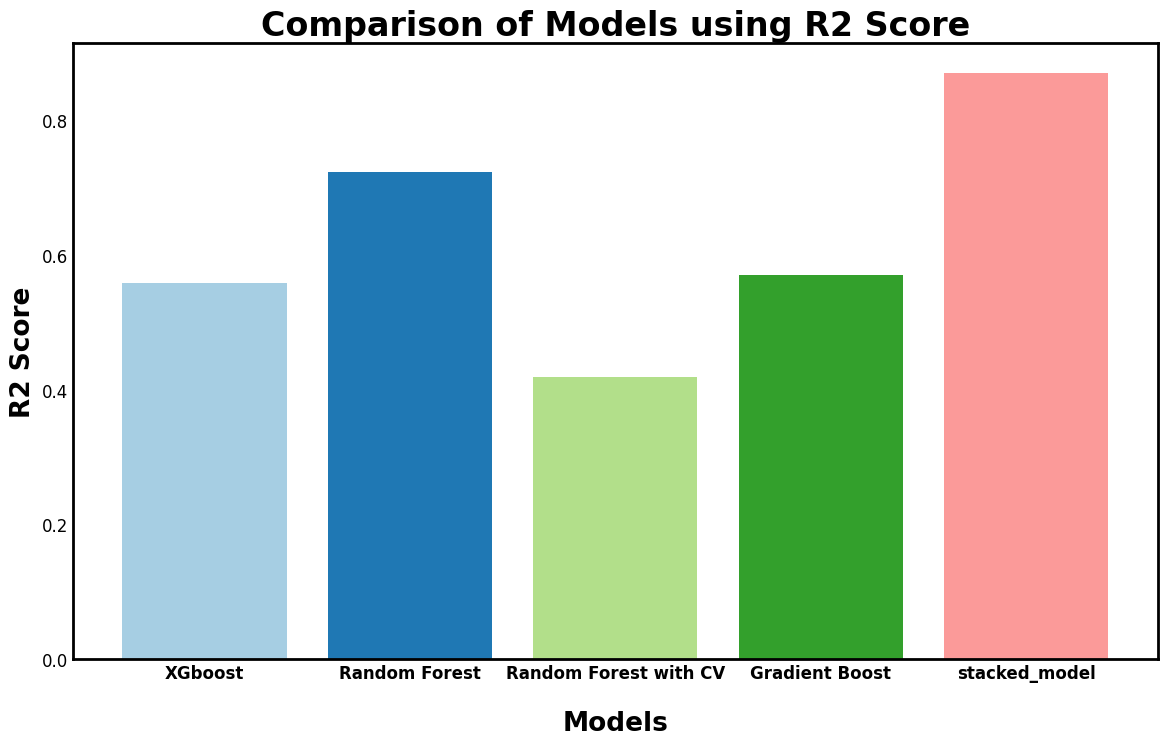

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = {'Model': ['XGboost', 'Random Forest', 'Random Forest with CV', 'Gradient Boost', 'stacked_model'],
        'R2 Score': [0.557585217167297, 0.7221664349359769,0.41898969127939517, 0.57, 0.87]}

# Define a custom color palette
colors = sns.color_palette('Paired', n_colors=len(data['Model']))

# Create a bar chart with the custom color palette
plt.figure(figsize=(14, 8))
plt.bar(data['Model'], data['R2 Score'], color=colors)
plt.title('Comparison of Models using R2 Score', fontsize=24, fontweight='bold')
plt.xlabel('Models', fontweight='bold', fontsize=19, labelpad=20)
plt.ylabel('R2 Score', fontweight='bold', fontsize=19)
plt.xticks(fontweight='bold', fontsize=14)
plt.tick_params(labelsize=12)
plt.show()


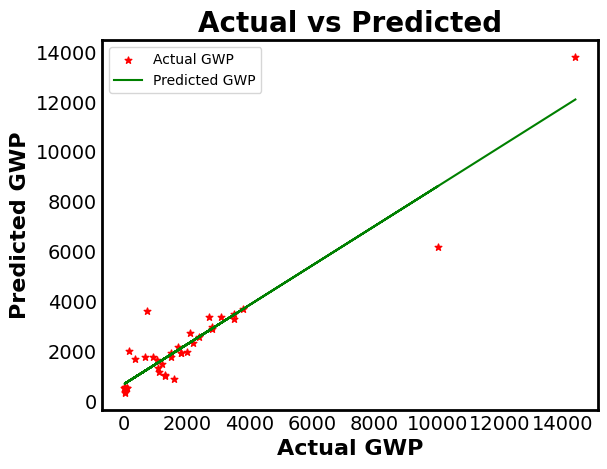

In [ ]:
import matplotlib.pyplot as plt

# Draw scatter plot of y_test and preds_test with changed dots
plt.scatter(y_test, preds_test, marker='*',color='red',s=25, label='Actual vs Predicted')

# Fit regression line on the scatter plot
z = np.polyfit(y_test, preds_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='green', label='Regression line')

# Set axis labels and title
plt.xlabel('Actual GWP',fontsize=16, fontweight='bold')
plt.ylabel('Predicted GWP',fontsize=16, fontweight='bold')
plt.title('Actual vs Predicted',fontsize=20, fontweight='bold')

# Add legend
plt.legend(labels=['Actual GWP', 'Predicted GWP'])

# Show the plot
plt.show()
